In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, RANSACRegressor

## Load the dataset

In [2]:
df = pd.read_excel('../Datasets/Boston.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


## Select the features

In [3]:
x = df[['RM']]
y = df[['MEDV']]

## Split into train and test sets

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

## Scale the features

In [5]:
x_sc = MinMaxScaler()
y_sc = MinMaxScaler()
x_train = x_sc.fit_transform(x_train)
x_test = x_sc.transform(x_test)
y_train = y_sc.fit_transform(y_train)
y_test = y_sc.transform(y_test)

## Train the model with RANSAC outlier elimination 

In [6]:
ransac = RANSACRegressor( LinearRegression(), max_trials=100, min_samples=50)
ransac.fit(x_train, y_train)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=50, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

## Evaluate the model

In [7]:
ransac.score(x_test,y_test)

0.46307654927579084

## Make predictions

In [8]:
x_fine = np.linspace(0,1,10).reshape(-1,1)
y_fine = ransac.predict(x_fine)

## Compare data with prediction

In [9]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

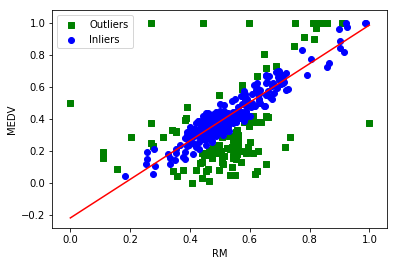

In [10]:
plt.scatter(x_train[outlier_mask], y_train[outlier_mask], c='g', marker='s', label='Outliers')
plt.scatter(x_train[inlier_mask], y_train[inlier_mask], c='b', marker='o', label='Inliers')
plt.plot(x_fine, y_fine, c='r')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend(loc='upper left')
plt.show()